# Tensor Algebras: A Computational Introduction

## 1. Mathematical Foundations

### 1.1 Definition of Tensors

A **tensor** is a multilinear map that generalizes scalars, vectors, and matrices to higher dimensions. Given a vector space $V$ over a field $\mathbb{F}$ (typically $\mathbb{R}$ or $\mathbb{C}$), a tensor of type $(r, s)$ is an element of the tensor product space:

$$T \in \underbrace{V \otimes V \otimes \cdots \otimes V}_{r \text{ copies}} \otimes \underbrace{V^* \otimes V^* \otimes \cdots \otimes V^*}_{s \text{ copies}}$$

where $V^*$ denotes the dual space of $V$.

### 1.2 Tensor Product

The **tensor product** $\otimes$ of two vectors $u \in V$ and $v \in W$ creates a bilinear object $u \otimes v \in V \otimes W$ satisfying:

$$
\begin{aligned}
(u_1 + u_2) \otimes v &= u_1 \otimes v + u_2 \otimes v \\
u \otimes (v_1 + v_2) &= u \otimes v_1 + u \otimes v_2 \\
(\alpha u) \otimes v &= u \otimes (\alpha v) = \alpha (u \otimes v)
\end{aligned}
$$

In component form, if $u = u^i e_i$ and $v = v^j f_j$, then:

$$u \otimes v = u^i v^j (e_i \otimes f_j)$$

### 1.3 The Tensor Algebra

The **tensor algebra** $T(V)$ over a vector space $V$ is the direct sum of all tensor powers:

$$T(V) = \bigoplus_{k=0}^{\infty} V^{\otimes k} = \mathbb{F} \oplus V \oplus (V \otimes V) \oplus (V \otimes V \otimes V) \oplus \cdots$$

where $V^{\otimes 0} = \mathbb{F}$ (the base field) and $V^{\otimes 1} = V$.

The tensor algebra forms an **associative algebra** with multiplication given by the tensor product:

$$\cdot : T(V) \times T(V) \to T(V), \quad (a, b) \mapsto a \otimes b$$

### 1.4 Index Notation and Einstein Summation

A tensor $T$ of type $(r, s)$ has components $T^{i_1 \cdots i_r}_{j_1 \cdots j_s}$. Under a change of basis $e'_i = A^j_i e_j$, the components transform as:

$$T'^{i_1 \cdots i_r}_{j_1 \cdots j_s} = A^{i_1}_{k_1} \cdots A^{i_r}_{k_r} (A^{-1})^{l_1}_{j_1} \cdots (A^{-1})^{l_s}_{j_s} T^{k_1 \cdots k_r}_{l_1 \cdots l_s}$$

**Einstein summation convention**: Repeated indices (one upper, one lower) imply summation.

### 1.5 Tensor Contraction

**Contraction** reduces the rank of a tensor by summing over a pair of indices:

$$C^i_j(T^{abc}_{def}) = T^{abi}_{dif} = \sum_{i} T^{abi}_{dif}$$

For a matrix (type (1,1) tensor), contraction yields the trace:

$$\text{Tr}(A) = A^i_i = \sum_i A^i_i$$

## 2. Computational Implementation

We now implement tensor algebra operations using NumPy, demonstrating the mathematical concepts computationally.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Set random seed for reproducibility
np.random.seed(42)

print("Tensor Algebras: Computational Demonstrations")
print("=" * 50)

Tensor Algebras: Computational Demonstrations


### 2.1 Tensor Product Implementation

The outer product of vectors creates a rank-2 tensor. More generally, `np.tensordot` and `np.einsum` handle arbitrary tensor products.

In [2]:
def tensor_product(a, b):
    """
    Compute the tensor product of two arrays.
    The result has shape a.shape + b.shape.
    """
    return np.tensordot(a, b, axes=0)

# Example: Tensor product of two vectors
u = np.array([1, 2, 3])
v = np.array([4, 5])

T_uv = tensor_product(u, v)
print("Vector u:", u)
print("Vector v:", v)
print("\nTensor product u ⊗ v:")
print(T_uv)
print(f"Shape: {T_uv.shape} (rank-2 tensor)")

Vector u: [1 2 3]
Vector v: [4 5]

Tensor product u ⊗ v:
[[ 4  5]
 [ 8 10]
 [12 15]]
Shape: (3, 2) (rank-2 tensor)


In [3]:
# Verify bilinearity property: (αu) ⊗ v = α(u ⊗ v)
alpha = 2.5
lhs = tensor_product(alpha * u, v)
rhs = alpha * tensor_product(u, v)

print("Bilinearity verification:")
print(f"(αu) ⊗ v = α(u ⊗ v): {np.allclose(lhs, rhs)}")

# Verify distributivity: (u₁ + u₂) ⊗ v = u₁ ⊗ v + u₂ ⊗ v
u1 = np.array([1, 0, 1])
u2 = np.array([0, 2, 2])
lhs = tensor_product(u1 + u2, v)
rhs = tensor_product(u1, v) + tensor_product(u2, v)
print(f"(u₁ + u₂) ⊗ v = u₁ ⊗ v + u₂ ⊗ v: {np.allclose(lhs, rhs)}")

Bilinearity verification:
(αu) ⊗ v = α(u ⊗ v): True
(u₁ + u₂) ⊗ v = u₁ ⊗ v + u₂ ⊗ v: True


### 2.2 Higher-Order Tensors

We can construct tensors of arbitrary rank through iterated tensor products.

In [4]:
# Create a rank-3 tensor from three vectors
a = np.array([1, 2])
b = np.array([3, 4])
c = np.array([5, 6])

# T = a ⊗ b ⊗ c
T_abc = tensor_product(tensor_product(a, b), c)
print(f"Rank-3 tensor a ⊗ b ⊗ c has shape: {T_abc.shape}")
print(f"Total number of components: {T_abc.size}")
print("\nComponents T_ijk:")
for i in range(2):
    for j in range(2):
        for k in range(2):
            print(f"  T[{i},{j},{k}] = {T_abc[i,j,k]}")

Rank-3 tensor a ⊗ b ⊗ c has shape: (2, 2, 2)
Total number of components: 8

Components T_ijk:
  T[0,0,0] = 15
  T[0,0,1] = 18
  T[0,1,0] = 20
  T[0,1,1] = 24
  T[1,0,0] = 30
  T[1,0,1] = 36
  T[1,1,0] = 40
  T[1,1,1] = 48


### 2.3 Tensor Contraction

Contraction sums over paired indices, reducing the tensor rank. Using `np.einsum` provides elegant notation matching index notation.

In [5]:
# Create a rank-2 tensor (matrix)
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Contraction (trace): sum over diagonal = A^i_i
trace_einsum = np.einsum('ii->', A)
trace_numpy = np.trace(A)

print("Matrix A:")
print(A)
print(f"\nTrace via einsum (A^i_i): {trace_einsum}")
print(f"Trace via np.trace: {trace_numpy}")

Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Trace via einsum (A^i_i): 15
Trace via np.trace: 15


In [6]:
# Contraction of a rank-4 tensor
# Create T^{ij}_{kl} and contract over j and k to get T^i_l
n = 3
T4 = np.random.randn(n, n, n, n)  # T^{ij}_{kl}

# Contract: sum over j=k -> T^i_l = T^{ij}_{jl}
T2_contracted = np.einsum('ijjl->il', T4)

print(f"Original rank-4 tensor shape: {T4.shape}")
print(f"After contraction (j=k), rank-2 tensor shape: {T2_contracted.shape}")
print("\nContracted tensor T^i_l:")
print(T2_contracted)

Original rank-4 tensor shape: (3, 3, 3, 3)
After contraction (j=k), rank-2 tensor shape: (3, 3)

Contracted tensor T^i_l:
[[ 0.1942937  -1.94062196 -2.22822287]
 [ 0.18747697 -0.53909411  0.49135082]
 [ 1.05075018 -0.0527559  -0.69725339]]


### 2.4 Tensor Transformations Under Change of Basis

A fundamental property of tensors is their transformation law under change of basis.

In [7]:
def transform_vector(v, A):
    """Transform contravariant vector: v'^i = A^i_j v^j"""
    return np.einsum('ij,j->i', A, v)

def transform_covector(w, A):
    """Transform covariant vector: w'_i = (A^{-1})^j_i w_j"""
    A_inv = np.linalg.inv(A)
    return np.einsum('ji,j->i', A_inv, w)

def transform_tensor_11(T, A):
    """Transform type (1,1) tensor: T'^i_j = A^i_k (A^{-1})^l_j T^k_l"""
    A_inv = np.linalg.inv(A)
    return np.einsum('ik,lj,kl->ij', A, A_inv, T)

# Define a rotation matrix (orthogonal transformation)
theta = np.pi / 4  # 45 degrees
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Original vector and tensor
v_orig = np.array([1, 0])
T_orig = np.array([[2, 1],
                   [0, 3]])

# Transform
v_new = transform_vector(v_orig, R)
T_new = transform_tensor_11(T_orig, R)

print("Rotation by 45°:")
print(f"Original vector: {v_orig}")
print(f"Transformed vector: {v_new}")
print(f"\nOriginal tensor:\n{T_orig}")
print(f"Transformed tensor:\n{T_new}")

# Verify trace is invariant
print(f"\nTrace invariance: {np.trace(T_orig):.6f} = {np.trace(T_new):.6f}")

Rotation by 45°:
Original vector: [1 0]
Transformed vector: [0.70710678 0.70710678]

Original tensor:
[[2 1]
 [0 3]]
Transformed tensor:
[[ 2.  0.]
 [-1.  3.]]

Trace invariance: 5.000000 = 5.000000


### 2.5 Metric Tensor and Index Raising/Lowering

The **metric tensor** $g_{ij}$ allows conversion between contravariant and covariant indices:

$$v_i = g_{ij} v^j \quad \text{(lowering)}$$
$$v^i = g^{ij} v_j \quad \text{(raising)}$$

where $g^{ij}$ is the inverse metric.

In [8]:
# Define a non-trivial metric (e.g., for oblique coordinates)
# g_ij corresponds to basis vectors at 60° angle
angle = np.pi / 3  # 60 degrees
g = np.array([[1, np.cos(angle)],
              [np.cos(angle), 1]])

g_inv = np.linalg.inv(g)  # Inverse metric g^{ij}

print("Metric tensor g_ij:")
print(g)
print("\nInverse metric g^ij:")
print(g_inv)

# Verify g g^{-1} = δ
print(f"\ng g^{{-1}} = identity: {np.allclose(g @ g_inv, np.eye(2))}")

# Index lowering: v_i = g_{ij} v^j
v_up = np.array([1, 2])  # Contravariant components v^i
v_down = np.einsum('ij,j->i', g, v_up)  # Covariant components v_i

print(f"\nContravariant v^i: {v_up}")
print(f"Covariant v_i (lowered): {v_down}")

# Verify raising brings it back
v_raised = np.einsum('ij,j->i', g_inv, v_down)
print(f"Raised back v^i: {v_raised}")
print(f"Roundtrip successful: {np.allclose(v_up, v_raised)}")

Metric tensor g_ij:
[[1.  0.5]
 [0.5 1. ]]

Inverse metric g^ij:
[[ 1.33333333 -0.66666667]
 [-0.66666667  1.33333333]]

g g^{-1} = identity: True

Contravariant v^i: [1 2]
Covariant v_i (lowered): [2.  2.5]
Raised back v^i: [1. 2.]
Roundtrip successful: True


### 2.6 Symmetric and Antisymmetric Tensors

Tensors can be decomposed into symmetric and antisymmetric parts:

$$T_{(ij)} = \frac{1}{2}(T_{ij} + T_{ji}) \quad \text{(symmetric)}$$
$$T_{[ij]} = \frac{1}{2}(T_{ij} - T_{ji}) \quad \text{(antisymmetric)}$$

In [9]:
def symmetrize(T, axes=(0, 1)):
    """Symmetrize tensor over specified axes."""
    return 0.5 * (T + np.swapaxes(T, axes[0], axes[1]))

def antisymmetrize(T, axes=(0, 1)):
    """Antisymmetrize tensor over specified axes."""
    return 0.5 * (T - np.swapaxes(T, axes[0], axes[1]))

# Create a general rank-2 tensor
T = np.array([[1, 4, 7],
              [2, 5, 8],
              [3, 6, 9]])

T_sym = symmetrize(T)
T_antisym = antisymmetrize(T)

print("Original tensor T:")
print(T)
print("\nSymmetric part T_(ij):")
print(T_sym)
print("\nAntisymmetric part T_[ij]:")
print(T_antisym)
print(f"\nVerify T = T_(ij) + T_[ij]: {np.allclose(T, T_sym + T_antisym)}")

Original tensor T:
[[1 4 7]
 [2 5 8]
 [3 6 9]]

Symmetric part T_(ij):
[[1. 3. 5.]
 [3. 5. 7.]
 [5. 7. 9.]]

Antisymmetric part T_[ij]:
[[ 0.  1.  2.]
 [-1.  0.  1.]
 [-2. -1.  0.]]

Verify T = T_(ij) + T_[ij]: True


### 2.7 The Levi-Civita Symbol

The **Levi-Civita symbol** $\epsilon_{ijk...}$ is a totally antisymmetric tensor:

$$\epsilon_{ijk} = \begin{cases} +1 & \text{even permutation of } (1,2,3) \\ -1 & \text{odd permutation} \\ 0 & \text{repeated indices} \end{cases}$$

In [10]:
def levi_civita(n):
    """Construct the n-dimensional Levi-Civita symbol."""
    shape = (n,) * n
    eps = np.zeros(shape)
    
    # Iterate over all permutations
    for perm in product(range(n), repeat=n):
        if len(set(perm)) == n:  # No repeated indices
            # Count inversions to determine sign
            inversions = sum(1 for i in range(n) for j in range(i+1, n) if perm[i] > perm[j])
            eps[perm] = (-1) ** inversions
    
    return eps

# 3D Levi-Civita symbol
eps3 = levi_civita(3)
print("Levi-Civita symbol ε_ijk (3D):")
for i in range(3):
    for j in range(3):
        for k in range(3):
            if eps3[i,j,k] != 0:
                print(f"  ε[{i},{j},{k}] = {int(eps3[i,j,k])}")

Levi-Civita symbol ε_ijk (3D):
  ε[0,1,2] = 1
  ε[0,2,1] = -1
  ε[1,0,2] = -1
  ε[1,2,0] = 1
  ε[2,0,1] = 1
  ε[2,1,0] = -1


In [11]:
# Application: Cross product via Levi-Civita
# (a × b)^i = ε^{ijk} a_j b_k

a = np.array([1, 0, 0])
b = np.array([0, 1, 0])

cross_einsum = np.einsum('ijk,j,k->i', eps3, a, b)
cross_numpy = np.cross(a, b)

print(f"a = {a}")
print(f"b = {b}")
print(f"a × b (via Levi-Civita): {cross_einsum}")
print(f"a × b (via np.cross): {cross_numpy}")

a = [1 0 0]
b = [0 1 0]
a × b (via Levi-Civita): [0. 0. 1.]
a × b (via np.cross): [0 0 1]


## 3. Visualization: Tensor Algebra Structure

We visualize the structure of tensor spaces and transformation properties.

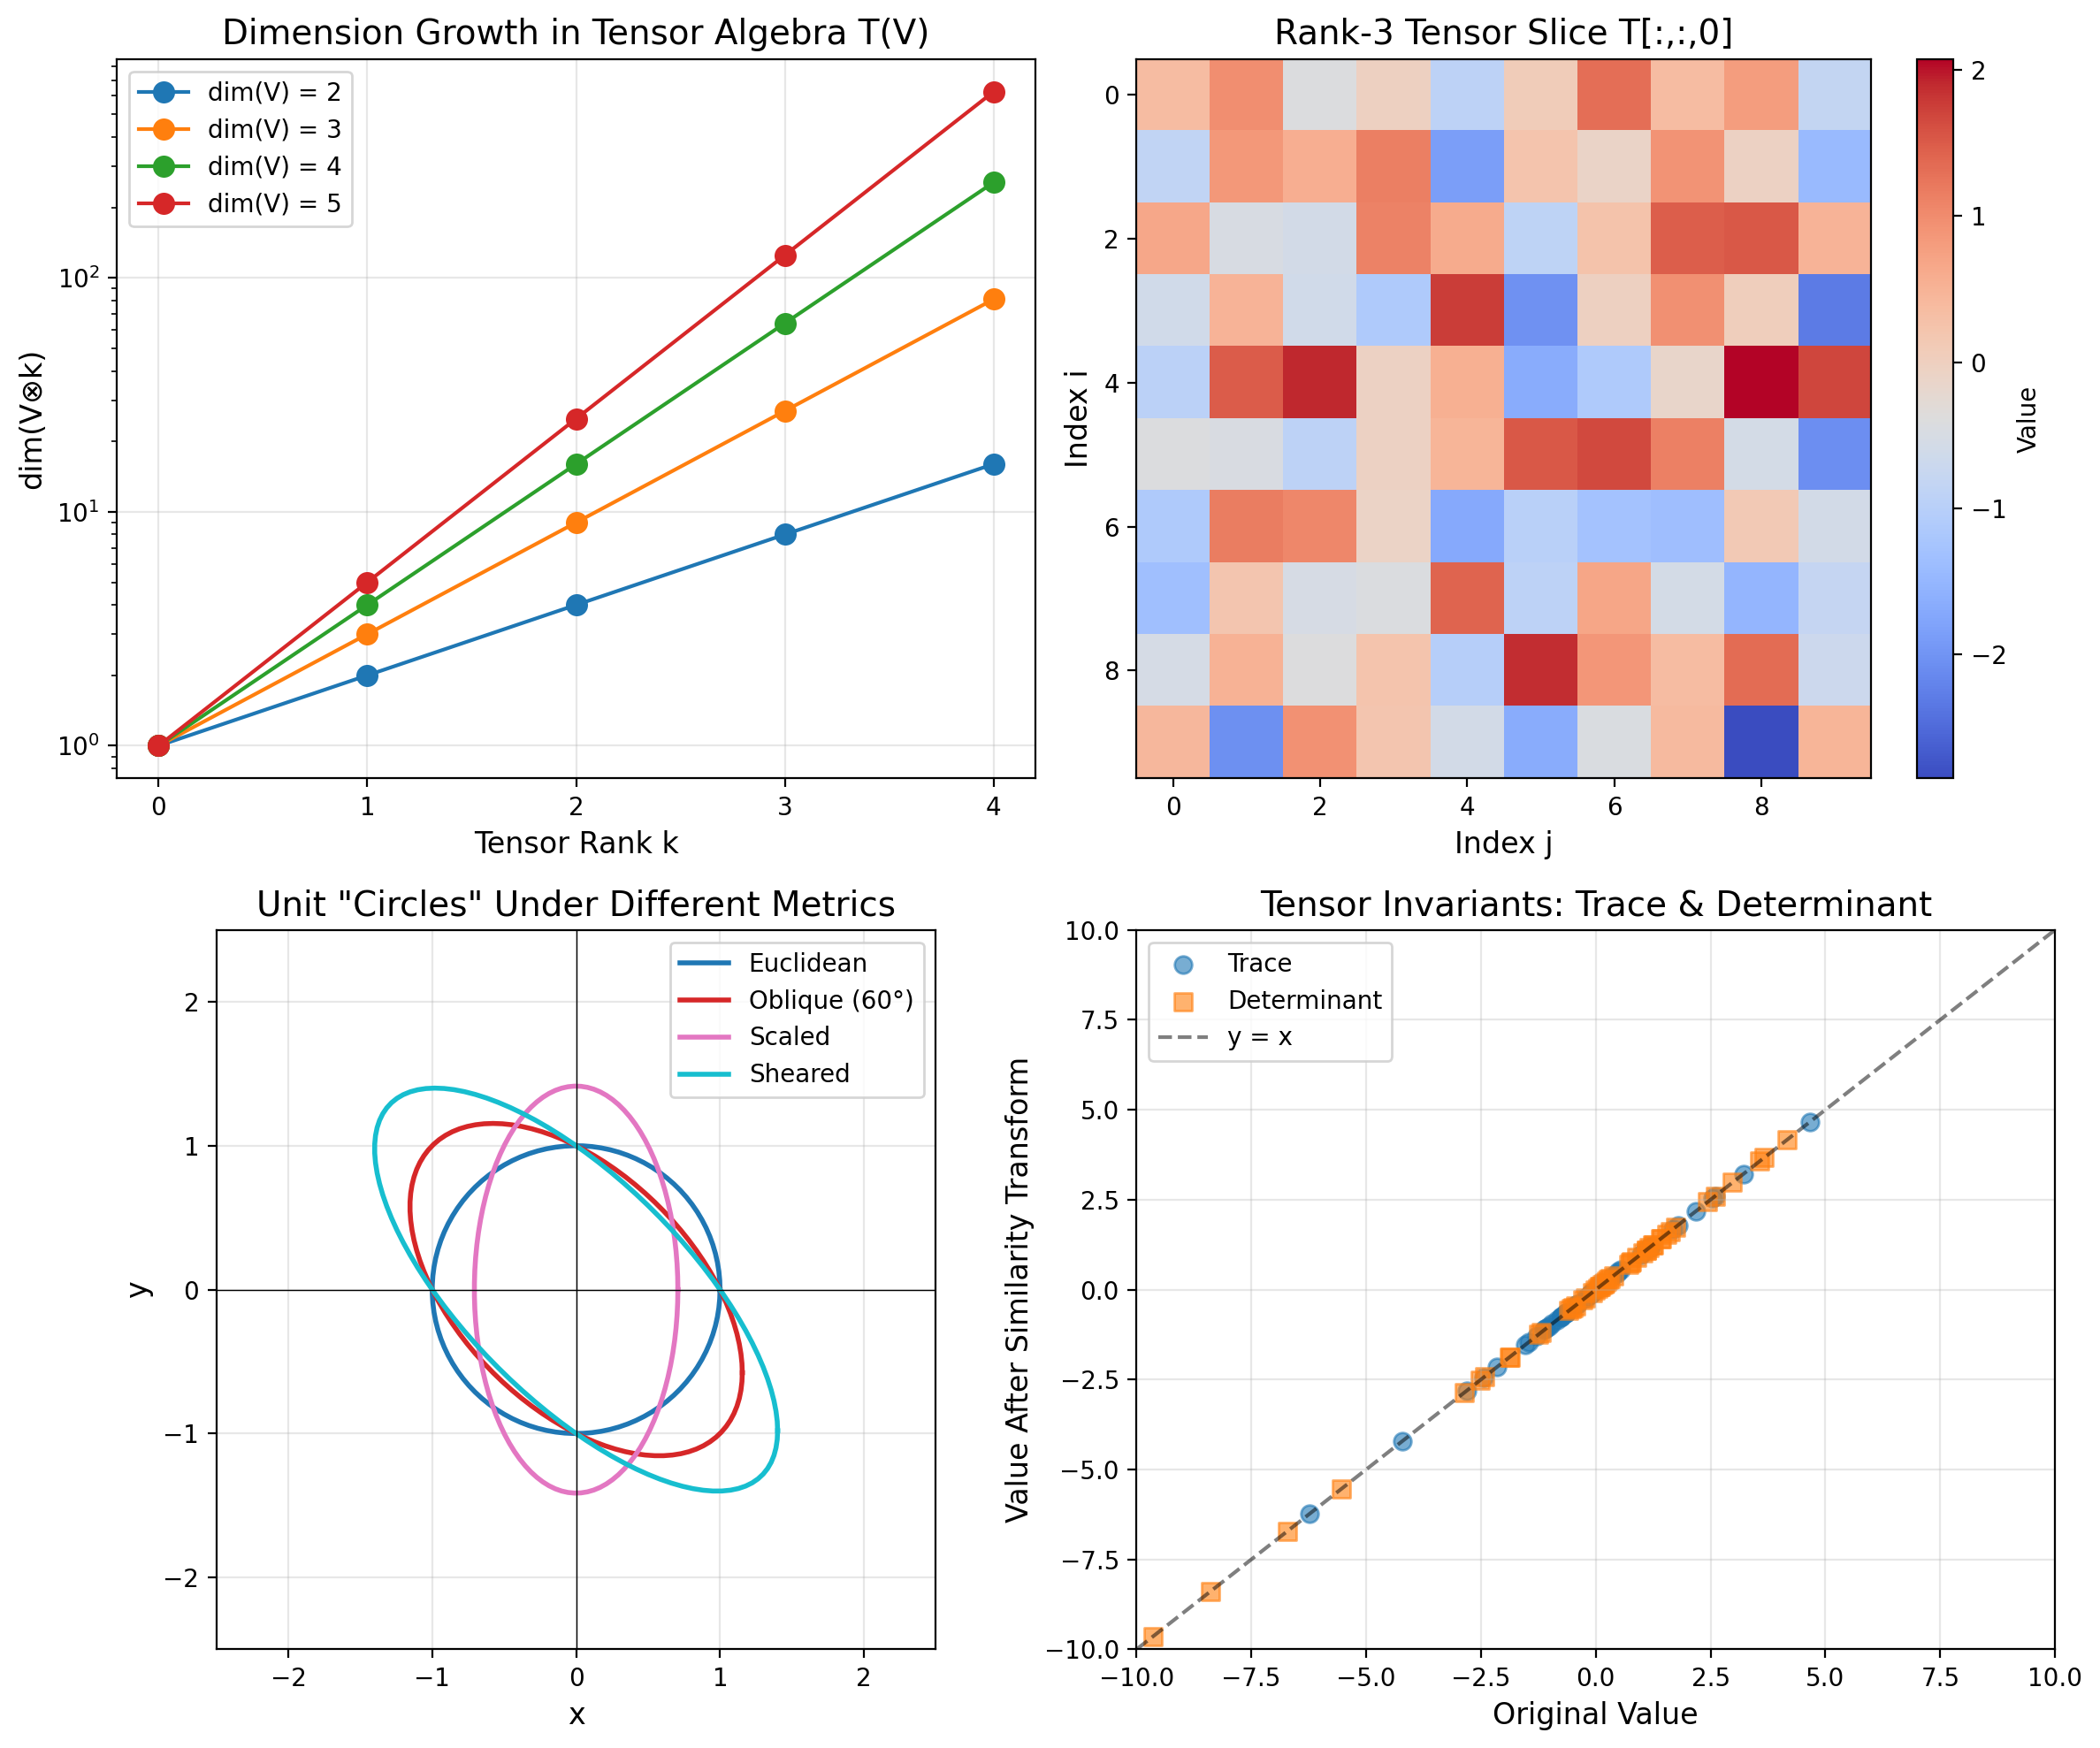


Figure saved to plot.png


In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Tensor product structure (dimension growth)
ax1 = axes[0, 0]
dims = [2, 3, 4, 5]
ranks = range(0, 5)
for d in dims:
    tensor_dims = [d**r for r in ranks]
    ax1.semilogy(ranks, tensor_dims, 'o-', label=f'dim(V) = {d}', markersize=8)
ax1.set_xlabel('Tensor Rank k', fontsize=12)
ax1.set_ylabel('dim(V⊗k)', fontsize=12)
ax1.set_title('Dimension Growth in Tensor Algebra T(V)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xticks(ranks)

# Plot 2: Tensor contraction network
ax2 = axes[0, 1]
# Visualize contraction as a heatmap showing correlation structure
n = 10
T = np.random.randn(n, n, n)
# Contract over first and last index: T^i_j_i -> V_j
contracted = np.einsum('iji->j', T)
# Show the "projection" effect
original_slices = T[:, :, 0]  # Slice of original
im = ax2.imshow(original_slices, cmap='coolwarm', aspect='auto')
ax2.set_title('Rank-3 Tensor Slice T[:,:,0]', fontsize=14)
ax2.set_xlabel('Index j', fontsize=12)
ax2.set_ylabel('Index i', fontsize=12)
plt.colorbar(im, ax=ax2, label='Value')

# Plot 3: Metric tensor geometry
ax3 = axes[1, 0]
# Visualize how metric transforms unit circle
theta_vals = np.linspace(0, 2*np.pi, 100)
circle = np.array([np.cos(theta_vals), np.sin(theta_vals)])

# Different metrics
metrics = {
    'Euclidean': np.eye(2),
    'Oblique (60°)': np.array([[1, 0.5], [0.5, 1]]),
    'Scaled': np.array([[2, 0], [0, 0.5]]),
    'Sheared': np.array([[1, 0.7], [0.7, 1]])
}

colors = plt.cm.tab10(np.linspace(0, 1, len(metrics)))
for (name, g), color in zip(metrics.items(), colors):
    # Unit vectors under metric: |v|_g = 1 means g_ij v^i v^j = 1
    # Transform circle by sqrt(g^{-1}) to get unit ellipse
    g_inv = np.linalg.inv(g)
    L = np.linalg.cholesky(g_inv)
    ellipse = L @ circle
    ax3.plot(ellipse[0], ellipse[1], '-', color=color, label=name, linewidth=2)

ax3.set_xlim(-2.5, 2.5)
ax3.set_ylim(-2.5, 2.5)
ax3.set_aspect('equal')
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)
ax3.set_title('Unit "Circles" Under Different Metrics', fontsize=14)
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('y', fontsize=12)
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# Plot 4: Invariants under transformation
ax4 = axes[1, 1]
# Show that trace and determinant are invariants under similarity transform
n_trials = 50
traces_orig = []
traces_transformed = []
dets_orig = []
dets_transformed = []

for _ in range(n_trials):
    # Random matrix
    M = np.random.randn(3, 3)
    # Random invertible transformation
    P = np.random.randn(3, 3)
    while np.abs(np.linalg.det(P)) < 0.1:
        P = np.random.randn(3, 3)
    
    # Similarity transform: M' = P M P^{-1}
    M_transformed = P @ M @ np.linalg.inv(P)
    
    traces_orig.append(np.trace(M))
    traces_transformed.append(np.trace(M_transformed))
    dets_orig.append(np.linalg.det(M))
    dets_transformed.append(np.linalg.det(M_transformed))

ax4.scatter(traces_orig, traces_transformed, alpha=0.6, label='Trace', s=50)
ax4.scatter(dets_orig, dets_transformed, alpha=0.6, label='Determinant', s=50, marker='s')
# Perfect correlation line
lims = [-10, 10]
ax4.plot(lims, lims, 'k--', alpha=0.5, label='y = x')
ax4.set_xlim(lims)
ax4.set_ylim(lims)
ax4.set_xlabel('Original Value', fontsize=12)
ax4.set_ylabel('Value After Similarity Transform', fontsize=12)
ax4.set_title('Tensor Invariants: Trace & Determinant', fontsize=14)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tensor_algebras_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to plot.png")

## 4. Summary

This notebook has demonstrated the fundamental concepts of **tensor algebras**:

1. **Tensor Products**: Bilinear operations creating higher-rank tensors, with dimension growing as $d^k$ for rank-$k$ tensors over a $d$-dimensional space.

2. **Contraction**: Index summation reducing tensor rank, generalizing the trace operation.

3. **Transformation Laws**: Tensors transform covariantly/contravariantly under basis changes, preserving geometric meaning.

4. **Metric Tensors**: Enable raising/lowering indices, defining inner products and geometry.

5. **Symmetry Properties**: Tensors decompose into symmetric and antisymmetric parts; the Levi-Civita symbol is totally antisymmetric.

6. **Invariants**: Quantities like trace and determinant remain unchanged under similarity transformations.

### Applications

Tensor algebras are foundational in:
- **General Relativity**: Spacetime curvature described by the Riemann tensor $R^\mu_{\nu\rho\sigma}$
- **Continuum Mechanics**: Stress and strain tensors $\sigma_{ij}$, $\epsilon_{ij}$
- **Machine Learning**: Deep learning operations, tensor decompositions (CP, Tucker)
- **Quantum Mechanics**: Multipartite quantum states live in tensor product spaces